In [643]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('dataset_group.csv', header=None)
#В файле нет строки с названием столбцов, поэтому параметр header равен None.
#Интерес представляет информация об id покупателя - столбец с названием 1
#Название купленного товара хранится в столбце с названием 2

In [644]:
unique_id = list(set(all_data[1]))
print(len(unique_id))  #Выведем количество id

1139


In [645]:
items = list(set(all_data[2]))
print(len(items))  #Выведем количество товаров


38


In [646]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
            items] for id in unique_id]

In [647]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [648]:
print(df)

      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/detergent  .

In [649]:
'Данные представляются в виде таблицы (матрицы), где для каждого человека напротив товара стоит булево значение.'

'Данные представляются в виде таблицы (матрицы), где для каждого человека напротив товара стоит булево значение.'

In [650]:
from mlxtend.frequent_patterns import apriori

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))  #добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

In [651]:
'Таблица представляет из себя набор элементов с минимальным выставленным порогом поддержки 0.3. То есть в датафрейме данный набор встречается минимум 30%. Length показывает количество элементов в наборе'

'Таблица представляет из себя набор элементов с минимальным выставленным порогом поддержки 0.3. То есть в датафрейме данный набор встречается минимум 30%. Length показывает количество элементов в наборе'

In [652]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [653]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ', len(results))

     support                                    itemsets  length
38  0.310799                 (vegetables, aluminum foil)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (vegetables, cheeses)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (dishwashing liquid/detergent, vegetables)       2
44  0.326602                          (vegetables, eggs)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemstes

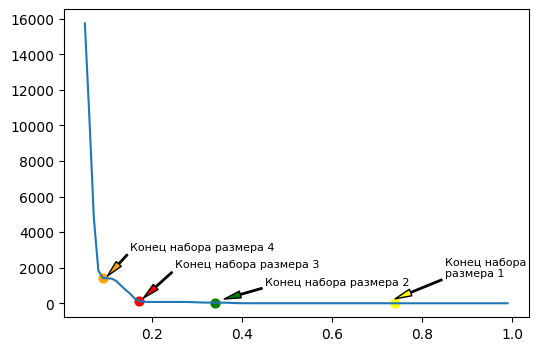

Уровень поддержки при котором перестают генерироваться наборы размера 4: 0.09000000000000000360822483004
Уровень поддержки при котором перестают генерироваться наборы размера 3: 0.1700000000000000052735593669
Уровень поддержки при котором перестают генерироваться наборы размера 2: 0.3400000000000000088123952576
Уровень поддержки при котором перестают генерироваться наборы размера 1: 0.7400000000000000171390679416


In [654]:
from decimal import Decimal

import matplotlib.pyplot as plt

start = Decimal(0.05)
support = []
length = []
max_len = []
while start <= 1:
    support.append(start)

    results = apriori(df, min_support=start, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))

    length.append(len(results))
    if len(results) > 0:
        max_len.append(max(results['length']))

    start += Decimal(0.01)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(support, length)

ax.scatter(support[max_len.index(3)], length[max_len.index(3)], color='orange', s=40, marker='o')
ax.annotate('Конец набора размера 4', xy=(support[max_len.index(3)] + Decimal(0.01), length[max_len.index(3)] + 100),
            xytext=(0.15, 3000),
            fontsize=8, arrowprops=dict(facecolor='orange', width=1, headwidth=5))

ax.scatter(support[max_len.index(2)], length[max_len.index(2)], color='red', s=40, marker='o')
ax.annotate('Конец набора размера 3', xy=(support[max_len.index(2)] + Decimal(0.01), length[max_len.index(2)] + 150),
            xytext=(0.25, 2000),
            fontsize=8, arrowprops=dict(facecolor='red', width=1, headwidth=5))

ax.scatter(support[max_len.index(1)], length[max_len.index(1)], color='green', s=40, marker='o')
ax.annotate('Конец набора размера 2', xy=(support[max_len.index(1)] + Decimal(0.02), length[max_len.index(1)] + 200),
            xytext=(0.45, 1000),
            fontsize=8, arrowprops=dict(facecolor='green', width=1, headwidth=5))

ax.scatter(support[len(max_len)], length[len(max_len)], color='yellow', s=40, marker='o')
ax.annotate('Конец набора\nразмера 1', xy=(support[len(max_len)], length[len(max_len)] + 250), xytext=(0.85, 1500),
            fontsize=8, arrowprops=dict(facecolor='yellow', width=1, headwidth=5))

plt.show()

print(f'Уровень поддержки при котором перестают генерироваться наборы размера 4: {support[max_len.index(3)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 3: {support[max_len.index(2)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 2: {support[max_len.index(1)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 1: {support[len(max_len)]}')

In [655]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
                new_items] for id in unique_id]

results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


In [656]:
te1 = TransactionEncoder()
te_ary1 = te1.fit(new_dataset).transform(new_dataset)
df1 = pd.DataFrame(te_ary1, columns=te1.columns_)

In [657]:
from mlxtend.frequent_patterns import association_rules

new_results = apriori(df1, min_support=0.3, use_colnames=True)

association_rules(new_results, min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(vegetables),(aluminum foil),0.739245,0.384548,0.310799,0.420428,1.093304,0.026524,1.061907
1,(aluminum foil),(vegetables),0.384548,0.739245,0.310799,0.808219,1.093304,0.026524,1.359651
2,(vegetables),(bagels),0.739245,0.385426,0.300263,0.406176,1.053836,0.015339,1.034943
3,(bagels),(vegetables),0.385426,0.739245,0.300263,0.779043,1.053836,0.015339,1.180118
4,(vegetables),(cereals),0.739245,0.395961,0.310799,0.420428,1.061789,0.018087,1.042214
5,(cereals),(vegetables),0.395961,0.739245,0.310799,0.784922,1.061789,0.018087,1.212377
6,(cheeses),(vegetables),0.390694,0.739245,0.309043,0.791011,1.070026,0.020225,1.247699
7,(vegetables),(cheeses),0.739245,0.390694,0.309043,0.418052,1.070026,0.020225,1.047012
8,(vegetables),(dinner rolls),0.739245,0.388938,0.308165,0.416865,1.071803,0.020645,1.047891
9,(dinner rolls),(vegetables),0.388938,0.739245,0.308165,0.792325,1.071803,0.020645,1.255592


In [658]:
new_results_2 = apriori(df1, min_support=0.15, use_colnames=True)
rules_2 = association_rules(new_results_2, min_threshold=0.15)
rules_2["antecedent_len"] = rules_2["antecedents"].apply(lambda x: len(x))

rules_2[(rules_2['antecedent_len'] > 1) & (
    rules_2["antecedents"].apply(lambda x: 'yogurt' in str(x) or 'waffles' in str(x)))]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
209,"(vegetables, yogurt)",(aluminum foil),0.319579,0.384548,0.152766,0.478022,1.243075,0.029872,1.179077,2
210,"(aluminum foil, yogurt)",(vegetables),0.177349,0.739245,0.152766,0.861386,1.165224,0.021662,1.881161,2
262,"(vegetables, yogurt)",(eggs),0.319579,0.389816,0.157155,0.491758,1.261515,0.032579,1.200579,2
263,"(eggs, yogurt)",(vegetables),0.174715,0.739245,0.157155,0.899497,1.216779,0.027998,2.594513,2
275,"(lunch meat, waffles)",(vegetables),0.184372,0.739245,0.157155,0.852381,1.153043,0.020859,1.766405,2
276,"(waffles, vegetables)",(lunch meat),0.315189,0.395083,0.157155,0.498607,1.262030,0.032630,1.206473,2
281,"(vegetables, yogurt)",(poultry),0.319579,0.421422,0.152766,0.478022,1.134306,0.018088,1.108433,2
282,"(poultry, yogurt)",(vegetables),0.180860,0.739245,0.152766,0.844660,1.142599,0.019065,1.678611,2


In [668]:
new_dataset_3 = [[elem for elem in all_data[all_data[1] == id][2] if elem not in
                  new_items] for id in unique_id]


In [671]:
te3 = TransactionEncoder()
te_ary3 = te3.fit(new_dataset_3).transform(new_dataset_3)
df3 = pd.DataFrame(te_ary3, columns=te3.columns_)

results_3 = apriori(df3, min_support=0.05, use_colnames=True, max_len=10)

In [702]:
def check_first_s(string_list: list) -> bool:
    return len(list(filter(lambda y: y[0] == 's', string_list))) > 1


rules_3 = association_rules(results_3, min_threshold=0.05)
rules_3["antecedent_len"] = rules_3["antecedents"].apply(lambda x: len(x))
rules_3[(rules_3['antecedent_len'] > 1) & (rules_3["antecedents"].apply(lambda x: check_first_s(list(x))))]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1706,"(sandwich loaves, sandwich bags)",(all- purpose),0.137840,0.374890,0.051800,0.375796,1.002417,0.000125,1.001451,2
1712,"(shampoo, sandwich bags)",(all- purpose),0.146620,0.374890,0.057068,0.389222,1.038228,0.002101,1.023464,2
1718,"(soap, sandwich bags)",(all- purpose),0.158911,0.374890,0.069359,0.436464,1.164245,0.009785,1.109263,2
1724,"(spaghetti sauce, sandwich bags)",(all- purpose),0.147498,0.374890,0.056190,0.380952,1.016170,0.000894,1.009793,2
1730,"(sugar, sandwich bags)",(all- purpose),0.131694,0.374890,0.051800,0.393333,1.049196,0.002429,1.030401,2
...,...,...,...,...,...,...,...,...,...,...
10922,"(spaghetti sauce, soap)",(tortillas),0.160667,0.369622,0.064091,0.398907,1.079228,0.004705,1.048719,2
10929,"(soap, sugar)",(toilet paper),0.154522,0.378402,0.069359,0.448864,1.186208,0.010888,1.127848,2
10936,"(soap, sugar)",(tortillas),0.154522,0.369622,0.064969,0.420455,1.137524,0.007855,1.087710,2
10947,"(spaghetti sauce, sugar)",(toilet paper),0.144864,0.378402,0.065847,0.454545,1.201223,0.011030,1.139596,2


In [703]:
rules_3[(rules_3['support'] >= 0.1) & (rules_3["support"] <= 0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(beef),(all- purpose),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,1
1,(all- purpose),(beef),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,1
2,(butter),(all- purpose),0.367867,0.374890,0.147498,0.400955,1.069525,0.009588,1.043510,1
3,(all- purpose),(butter),0.374890,0.367867,0.147498,0.393443,1.069525,0.009588,1.042166,1
4,(coffee/tea),(all- purpose),0.379280,0.374890,0.146620,0.386574,1.031166,0.004431,1.019047,1
...,...,...,...,...,...,...,...,...,...,...
501,(sugar),(toilet paper),0.360843,0.378402,0.151888,0.420925,1.112374,0.015344,1.073432,1
502,(tortillas),(sugar),0.369622,0.360843,0.147498,0.399050,1.105883,0.014122,1.063578,1
503,(sugar),(tortillas),0.360843,0.369622,0.147498,0.408759,1.105883,0.014122,1.066194,1
504,(tortillas),(toilet paper),0.369622,0.378402,0.156277,0.422803,1.117337,0.016412,1.076925,1
